## Import Libraries

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold

## Read data file

In [103]:
data=pd.read_csv('DATA.csv')

In [104]:
data.head()

,Unnamed: 0,property,l0,l1,l2,l3,l4,l5,l6,l7,...,l218,l219,l220,l221,l222,l223,l224,l225,l226,l227
0,90919011058,20.4,0.570583,0.563274,0.563751,0.556788,0.558158,0.555296,0.550723,0.540790,...,0.363058,0.368084,0.370590,0.371403,0.365332,0.363507,0.363753,0.353504,0.361829,0.356587
1,90919011117,19.4,0.642535,0.629060,0.620302,0.621032,0.612483,0.615337,0.609619,0.603510,...,0.382406,0.386067,0.386030,0.389452,0.393870,0.392875,0.383737,0.372697,0.382084,0.369235
2,90919011137,18.0,0.723071,0.721512,0.714203,0.713402,0.707981,0.699660,0.691093,0.686809,...,0.451483,0.459320,0.462640,0.464255,0.459860,0.460782,0.455081,0.451765,0.444926,0.444266
3,90919011153,18.2,0.746653,0.743629,0.727223,0.731242,0.719794,0.718039,0.712864,0.704012,...,0.437686,0.445886,0.446993,0.447633,0.448130,0.442623,0.436148,0.425697,0.425114,0.425137
4,90919011340,14.0,0.491790,0.494596,0.479992,0.484192,0.477519,0.475930,0.468640,0.466945,...,0.281481,0.291317,0.293017,0.292048,0.297216,0.291218,0.287465,0.286818,0.271196,0.271146


In [105]:
data.isna().sum()

Unnamed: 0    0
property      0
l0            0
l1            0
l2            0
             ..
l223          0
l224          0
l225          0
l226          0
l227          0
Length: 230, dtype: int64

In [106]:
data.describe()

,Unnamed: 0,property,l0,l1,l2,l3,l4,l5,l6,l7,...,l218,l219,l220,l221,l222,l223,l224,l225,l226,l227
count,7.210000e+02,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,...,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,1.286861e+11,20.059639,0.664292,0.664491,0.665205,0.661436,0.657890,0.653812,0.647083,0.641679,...,0.397305,0.409975,0.420388,0.428545,0.432055,0.432515,0.430804,0.427821,0.422415,0.418035
std,2.226434e+10,3.021933,0.146718,0.148376,0.149984,0.149308,0.149387,0.148856,0.147328,0.146507,...,0.102851,0.106385,0.109669,0.112780,0.114475,0.115154,0.114948,0.114334,0.112368,0.110954
min,9.091901e+10,11.000000,0.280327,0.275113,0.281672,0.275068,0.273169,0.274316,0.269843,0.259430,...,0.097489,0.101449,0.105093,0.107516,0.115470,0.113796,0.110978,0.109568,0.109081,0.111343
25%,1.209190e+11,18.200000,0.560653,0.557199,0.553151,0.548087,0.545486,0.541282,0.536541,0.531985,...,0.336109,0.346857,0.354126,0.356238,0.359973,0.358962,0.356846,0.354807,0.350394,0.347713
50%,1.309190e+11,20.000000,0.675585,0.679501,0.678287,0.675833,0.673005,0.668995,0.662644,0.657094,...,0.407799,0.421187,0.429274,0.435632,0.435489,0.434760,0.431873,0.430976,0.427243,0.420548
75%,1.309191e+11,21.800000,0.780254,0.781567,0.783640,0.779741,0.776956,0.772860,0.763913,0.758687,...,0.458108,0.470754,0.483194,0.494644,0.501253,0.503438,0.500105,0.498193,0.491116,0.484200
max,1.609191e+11,28.200000,1.075330,1.070221,1.083390,1.076704,1.075603,1.072044,1.066201,1.063782,...,0.838631,0.871021,0.906111,0.934944,0.951959,0.962513,0.957908,0.950675,0.934136,0.915784


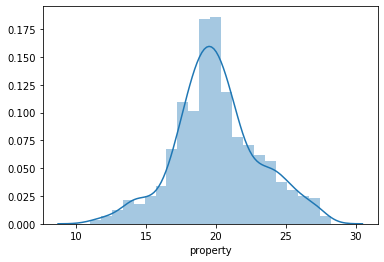

In [107]:
sns.distplot(data['property'])

In [108]:
data.corr()

,Unnamed: 0,property,l0,l1,l2,l3,l4,l5,l6,l7,...,l218,l219,l220,l221,l222,l223,l224,l225,l226,l227
Unnamed: 0,1.000000,0.025392,0.149888,0.162013,0.177647,0.175759,0.180355,0.178443,0.173834,0.173075,...,-0.113223,-0.092247,-0.064356,-0.033643,-0.005617,0.009960,0.019775,0.018605,0.010057,0.008986
property,0.025392,1.000000,0.151052,0.153147,0.155264,0.154972,0.158557,0.160099,0.159385,0.160807,...,-0.029550,-0.033702,-0.035357,-0.033809,-0.030874,-0.029072,-0.022060,-0.023781,-0.023183,-0.023621
l0,0.149888,0.151052,1.000000,0.999469,0.999006,0.999073,0.998816,0.998710,0.998675,0.998489,...,0.806143,0.807526,0.810421,0.814406,0.819063,0.821512,0.824839,0.823834,0.822228,0.824469
l1,0.162013,0.153147,0.999469,1.000000,0.999424,0.999457,0.999298,0.999204,0.999116,0.998926,...,0.802708,0.804274,0.807552,0.811946,0.816985,0.819668,0.823246,0.822155,0.820493,0.822763
l2,0.177647,0.155264,0.999006,0.999424,1.000000,0.999677,0.999663,0.999548,0.999413,0.999265,...,0.798484,0.800342,0.804051,0.809012,0.814607,0.817512,0.821286,0.820271,0.818393,0.820650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l223,0.009960,-0.029072,0.821512,0.819668,0.817512,0.818412,0.816826,0.816509,0.818014,0.818797,...,0.984411,0.989936,0.994734,0.997852,0.999133,1.000000,0.999094,0.998778,0.998289,0.997637
l224,0.019775,-0.022060,0.824839,0.823246,0.821286,0.822166,0.820710,0.820409,0.821908,0.822716,...,0.982790,0.988416,0.993496,0.997057,0.998696,0.999094,1.000000,0.998763,0.998350,0.997836
l225,0.018605,-0.023781,0.823834,0.822155,0.820271,0.821105,0.819693,0.819362,0.820897,0.821704,...,0.982931,0.988429,0.993360,0.996826,0.998485,0.998778,0.998763,1.000000,0.998100,0.997498
l226,0.010057,-0.023183,0.822228,0.820493,0.818393,0.819252,0.817806,0.817566,0.819135,0.819965,...,0.984201,0.989357,0.993810,0.996830,0.998082,0.998289,0.998350,0.998100,1.000000,0.997507


In [109]:
target=data['property'].values
data.drop(['Unnamed: 0', 'property'], axis=1, inplace=True)

In [110]:
# Check variation inflaton factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = add_constant(data)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).values

/home/dell/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


array([7.00868378e+01, 3.07710116e+03, 2.92592140e+03, 3.79949793e+03,
       4.64275993e+03, 5.88471701e+03, 5.69678459e+03, 8.07844865e+03,
       9.56317320e+03, 1.36131380e+04, 1.59626534e+04, 1.88006797e+04,
       1.95500092e+04, 2.24820042e+04, 2.75412795e+04, 3.04404537e+04,
       3.15215786e+04, 3.42660072e+04, 3.75147852e+04, 3.78380499e+04,
       4.66818928e+04, 4.59793951e+04, 4.92410479e+04, 5.95295350e+04,
       5.08376957e+04, 1.01650233e+05, 6.91012781e+04, 6.56937718e+04,
       6.98795465e+04, 6.80075587e+04, 7.19308138e+04, 7.80138251e+04,
       6.79441587e+04, 6.83062179e+04, 8.34282207e+04, 7.64351362e+04,
       8.64303920e+04, 7.14222916e+04, 7.35618647e+04, 7.33029541e+04,
       7.15775342e+04, 7.25161576e+04, 8.50536600e+04, 7.49384972e+04,
       8.25655238e+04, 8.99421664e+04, 7.92954880e+04, 8.30323319e+04,
       5.81124307e+04, 1.32103008e+05, 8.02510011e+04, 8.20067480e+04,
       7.77146540e+04, 7.96226633e+04, 8.40805002e+04, 9.20173877e+04,
      

### Check for outliers
Outliers are extreme values that fall a long way outside of the other observations. In a small dataset, the impact of an outlier can be much greater, since it will have a heavy weight for the model.

*IsolationForest* technique, which uses random forests for efficient detection of outliers in high-dimensional datasets. From scikit-learn documentation:

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.



In [111]:
isf = IsolationForest(n_jobs=-1,  random_state=0)
isf.fit(data, target)

print(isf.score_samples(data))

[-0.41167407 -0.40301424 -0.39816259 -0.39810025 -0.46020727 -0.50317219
 -0.40346003 -0.4306707  -0.48578186 -0.41732414 -0.40859823 -0.40984352
 -0.48902062 -0.42189784 -0.44910503 -0.40848135 -0.40699248 -0.40932369
 -0.42219042 -0.42349331 -0.41285835 -0.46418865 -0.42856829 -0.47689293
 -0.4190082  -0.39786236 -0.40570317 -0.409586   -0.4717349  -0.50308519
 -0.60451381 -0.5335137  -0.45086094 -0.51866733 -0.43198222 -0.48806047
 -0.41044266 -0.54338807 -0.41107232 -0.42779003 -0.52147758 -0.52100331
 -0.55933541 -0.48406181 -0.64072321 -0.43313354 -0.41381011 -0.48457244
 -0.52261928 -0.513323   -0.49683714 -0.47389978 -0.40533376 -0.40706082
 -0.42403675 -0.41116734 -0.44020591 -0.45951317 -0.45694596 -0.45545185
 -0.41302162 -0.41397664 -0.40019697 -0.40790872 -0.40874196 -0.3996266
 -0.42920245 -0.41173409 -0.45208168 -0.458064   -0.42418525 -0.43547655
 -0.45885411 -0.42751404 -0.39870599 -0.45192569 -0.42524514 -0.45738075
 -0.41271218 -0.4099135  -0.41610609 -0.58749447 -0.

###### predict the outliers (1 for inliers, -1 for outliers):

In [112]:
a=isf.predict(data)
a

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
        1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

Remove the rows with outlier values

In [113]:
ind=[i for i in range(len(a)) if a[i]==1]
data['property']=target
data=data.ix[ind]

/home/dell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
len(ind)

603

In [115]:
# data.to_csv('cleaned_data.csv', index=False, sep=',')

## Principle Component Analysis(PCA)

In [15]:
# clean_data=pd.read_csv('cleaned_data.csv')
# target=clean_data.property.values
# clean_data.drop(['property'], axis=True, inplace=True)
target=data.property.values

train_score = []
test_score = []
cum_variance = []

for i in range(1,228):
    X_train, X_test, y_train, y_test=train_test_split(data, target, test_size=.20, random_state=42)
#     y_train_std = sc.fit_transform(y_train[:, np.newaxis]).flatten()
    
    pipe_lr = Pipeline([('pca', PCA(n_components=i)),
                        ('slr',  RandomForestRegressor(n_estimators=1000, max_depth=7, max_features='sqrt', random_state=42))])
    pipe_lr.fit(X_train, y_train)
    y_train_pred = pipe_lr.predict(X_train)
    y_test_pred = pipe_lr.predict(X_test)
#     y_train_pred=sc.inverse_transform(y_train_pred_std)
#     y_test_pred=sc.inverse_transform(y_test_pred_std)
    
    train_score = np.append(train_score,
                            mean_squared_error(y_train, y_train_pred))
    
    test_score = np.append(test_score, 
                           mean_squared_error(y_test, y_test_pred))
    
    cum_variance = np.append(cum_variance, np.sum(pipe_lr.fit(X_train, y_train).named_steps['pca'].explained_variance_ratio_))

In [16]:
cum_variance[:10]

array([0.83459695, 0.98893259, 0.99858145, 0.99933411, 0.99965854,
       0.99982102, 0.99988398, 0.99993509, 0.99995475, 0.99996646])

In [116]:
data.reset_index(inplace=True)

In [120]:
# X_train, X_test, y_train, y_test=train_test_split(data, target, test_size=.10, random_state=42)
#     y_train_std = sc.fit_transform(y_train[:, np.newaxis]).flatten()

target=data.property.values
k=5
skf=KFold(n_splits=5, shuffle=True, random_state=42)


list_of_train_index = []
list_of_valid_index = []
test_mse=[]

for train_index, valid_index in skf.split(data, # Placeholder (dummy input)
                                          target): # True input
    
    list_of_train_index.append(train_index)
    list_of_valid_index.append(valid_index)
    
# Use train/valid indexes for cross-validation

pipe_lr = Pipeline([('pca', PCA(n_components=2)),
                    ('slr',  RandomForestRegressor(n_estimators=300, max_depth=5, random_state=42))])
for j in range(k):
            
    x_train = data.loc[list_of_train_index[j], :]
    x_valid = data.loc[list_of_valid_index[j], :]
    
    y_true_train = target[list_of_train_index[j]]
    y_true_valid = target[list_of_valid_index[j]]
    
    pipe_lr.fit(x_train, y_true_train)
    y_train_pred = pipe_lr.predict(x_train)
    y_test_pred = pipe_lr.predict(x_valid)
    test_error=mean_squared_error(y_true_valid, y_test_pred)
    
    print('train error: ',mean_squared_error(y_true_train, y_train_pred))
    print('test error: ',test_error)
    test_mse.append(test_error)
print('final_mse: ', sum(test_mse)/len(test_mse))

train error:  0.01004177345248876
test error:  0.014623263324387866
train error:  0.011698503545327563
test error:  0.025933435438702686
train error:  0.019100930771254142
test error:  0.04518514597548675
train error:  0.020720162353881157
test error:  0.031177618903764494
train error:  0.007457660298206783
test error:  0.017644416171749347
final_mse:  0.026912775962818224


In [19]:
mean_squared_error(y_test_pred, y_test)

0.012551380411003883

## Save Model

In [21]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(pipe_lr, open(filename, 'wb'))

In [ ]:
##END